Nama: Muhammad Abdal Rizky\
NIM: 2309106012

# Posttest 5

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

- Membaca file dataset

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

- Menghapus kolom person ID karena tidak kita butuhkan

In [3]:
df = df.drop('Person ID', axis=1)

- Karena Tekanan Darah memiliki nilai sistolik dan diastolik, kita pisahkan menjadi dua kolom

In [4]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df = df.drop('Blood Pressure', axis=1)

- Mengidentifikasi fitur numerik dan kategorikal

In [5]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

- Menghapus target dari daftar fitur kategorikal

In [6]:
target_column = 'Sleep Disorder'
categorical_features.remove(target_column)

- Memisahkan fitur (X) dan target (y)

In [7]:
X = df.drop(target_column, axis=1)
y = df[target_column]

- Mengkodekan variabel target

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

Di bawah ini kita:
- Membuat pipeline pra-pemrosesan untuk fitur
- Untuk fitur numerik, kita akan melakukan penskalaan
- Untuk fitur kategorikal, kita akan melakukan one-hot encoding

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

- Membagi data menjadi data latih (*training*) dan data validasi (*validation*)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

- Mengaplikasikan pipeline pra-pemrosesan

In [11]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

- Mendapatkan jumlah fitur setelah pra-pemrosesan untuk lapisan input model

In [12]:
input_dim = X_train_processed.shape[1]
output_dim = y_categorical.shape[1]

- Membangun Model Sekuensial Sederhana

In [13]:
model = tf.keras.models.Sequential([
    # Lapisan input dengan jumlah neuron sebanyak fitur dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    # Lapisan tersembunyi (hidden layer) pertama
    tf.keras.layers.Dense(16, activation='relu'),
    # Lapisan output dengan jumlah neuron sebanyak kelas target dan fungsi aktivasi softmax untuk klasifikasi multi-kelas
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Kompilasi kode
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Ringkasan Model:")
model.summary()

Ringkasan Model:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

Kode di atas mendefinisikan struktur model neural network kita, yang terdiri dari satu layer input, satu layer tersembunyi (*hidden layer*), dan satu layer output, kemudian menyiapkan model tersebut dengan optimizer, fungsi loss, dan metrik yang akan digunakan untuk pelatihan.

- Melatih model

In [14]:
print("Memulai proses training model...")
history = model.fit(
    X_train_processed,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val_processed, y_val),
    verbose=2
)
print("Training model selesai.")

Memulai proses training model...
Epoch 1/100
19/19 - 2s - 92ms/step - accuracy: 0.5987 - loss: 0.9648 - val_accuracy: 0.7600 - val_loss: 0.8216
Epoch 2/100
19/19 - 0s - 9ms/step - accuracy: 0.8094 - loss: 0.7259 - val_accuracy: 0.8267 - val_loss: 0.6807
Epoch 3/100
19/19 - 0s - 18ms/step - accuracy: 0.8227 - loss: 0.5934 - val_accuracy: 0.8133 - val_loss: 0.5906
Epoch 4/100
19/19 - 0s - 9ms/step - accuracy: 0.8696 - loss: 0.5090 - val_accuracy: 0.8800 - val_loss: 0.5380
Epoch 5/100
19/19 - 0s - 11ms/step - accuracy: 0.8997 - loss: 0.4525 - val_accuracy: 0.8667 - val_loss: 0.4978
Epoch 6/100
19/19 - 0s - 12ms/step - accuracy: 0.9064 - loss: 0.4104 - val_accuracy: 0.8667 - val_loss: 0.4679
Epoch 7/100
19/19 - 0s - 6ms/step - accuracy: 0.9064 - loss: 0.3853 - val_accuracy: 0.8533 - val_loss: 0.4472
Epoch 8/100
19/19 - 0s - 6ms/step - accuracy: 0.9130 - loss: 0.3674 - val_accuracy: 0.8533 - val_loss: 0.4325
Epoch 9/100
19/19 - 0s - 6ms/step - accuracy: 0.9130 - loss: 0.3524 - val_accuracy:

- Mengevaluasi model

In [15]:
print("Hasil Evaluasi Model:")
loss, accuracy = model.evaluate(X_train_processed, y_train, verbose=0)
print(f"Akurasi Training: {accuracy*100:.2f}%")

loss_val, accuracy_val = model.evaluate(X_val_processed, y_val, verbose=0)
print(f"Akurasi Validasi: {accuracy_val*100:.2f}%")

Hasil Evaluasi Model:
Akurasi Training: 93.31%
Akurasi Validasi: 86.67%


Perbedaan antara akurasi training (93.31%) dan akurasi validasi (86.67%) menunjukkan adanya kesenjangan kinerja. Model berkinerja lebih baik pada data yang sudah dikenalnya (training) dibandingkan data baru (validasi). Ini menunjukkan bahwa ada indikasi *overfitting*.

- Membuat plot untuk akurasi dan loss

Di bawah ini adalah plot akurasi:

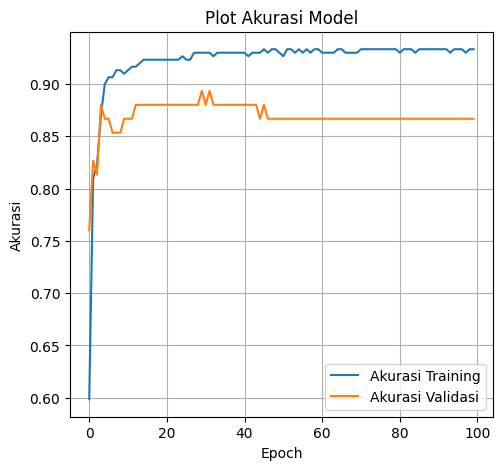

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Plot Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

Dari plot tersebut, kita bisa melihat bahwa akurasi pelatihan meningkat secara konsisten seiring berjalannya waktu, menunjukkan bahwa model belajar dengan baik dari data latihan. Namun, akurasi validasi cenderung stabil setelah beberapa epoch awal dan tidak meningkat sebanyak akurasi pelatihan. Ini bisa menjadi tanda overfitting, di mana model terlalu "menghafal" data latihan dan kurang baik dalam menggeneralisasikan pada data baru (data validasi).

- Plot Loss Model

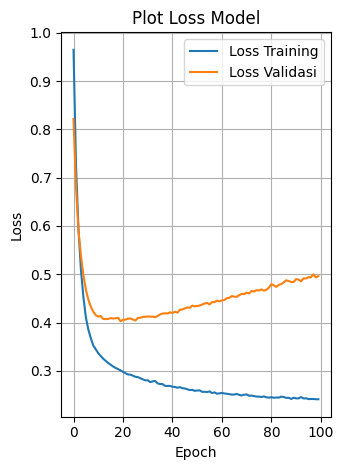

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Plot Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Dari plot tersebut, kita bisa melihat bahwa loss pelatihan terus menurun, yang menunjukkan bahwa model terus belajar dan mengurangi kesalahannya pada data latihan. Namun, loss validasi menurun pada awalnya tetapi kemudian mulai meningkat setelah beberapa epoch. Peningkatan loss validasi sementara loss pelatihan terus menurun adalah indikasi kuat adanya *overfitting*. Ini berarti model menjadi terlalu spesifik pada data latihan dan kehilangan kemampuannya untuk berkinerja baik pada data yang belum pernah dilihat sebelumnya (data validasi).